In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

from pathlib import Path
import os

from dotenv import load_dotenv

In [2]:
load_dotenv()
env_path = ('../.env')
load_dotenv(dotenv_path=env_path)

SPOTIFY_CLIENT = os.getenv('SPOTIFY_CLIENT')
SPOTIFY_SECRET = os.getenv('SPOTIFY_SECRET')
USERNAME = os.getenv('SPOTIFY_USERNAME')
redirect_uri = 'http://localhost:8888/callback/'

os.environ['SPOTIPY_CLIENT_ID']= SPOTIFY_CLIENT
os.environ['SPOTIPY_CLIENT_SECRET']= USERNAME
os.environ['SPOTIPY_REDIRECT_URI']= redirect_uri

print(SPOTIFY_CLIENT, SPOTIFY_SECRET, USERNAME)

a3ca004450a041b4b3e13c1f3bcc5ec5 b92d8f78722d44868c8b13dc4501ecd0 madathilvisakh


In [3]:
#authorizations
scope = 'user-library-read user-top-read playlist-modify-public playlist-read-private'


credentials_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT, client_secret=SPOTIFY_SECRET) 
sp = spotipy.Spotify(client_credentials_manager=credentials_manager)
token = util.prompt_for_user_token(USERNAME, scope, SPOTIFY_CLIENT, SPOTIFY_SECRET, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", USERNAME) 

In [4]:
#getting the user's saved tracks 

results = sp.current_user_saved_tracks()
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

#printing out all the saved tracks in the user's library 
for track in tracks:
    print(track['track']['name'])

Entrégala
Pretty Please
LA CANCIÓN
Professional
Adaptation
Kiss Land
Heat Waves
MONTERO (Call Me By Your Name)
Save Your Tears (with Ariana Grande) (Remix)
Kiss Me More (feat. SZA)
FEEL.
I Don't Dance
my ex's best friend (with blackbear)
Old Yellow Bricks
If You Were There, Beware
505
Right Side of My Neck
the WORLD
Kingston
Wait a Minute!
Way Out (feat. Big Sean)
21C/Delta
Raingurl
Love Story (Taylor’s Version)
Fkn Around (feat. Megan Thee Stallion)
Love It If We Made It
Don't Touch My Hair (feat. Sampha)
i finally understand
Goodie Bag
Leave The Door Open
We're Good
I Don't Care - Single Version
The Phoenix
My Songs Know What You Did In The Dark (Light Em Up)
The Only Difference Between Martyrdom and Suicide Is Press Coverage
Misery Business
Mauja Hi Mauja
Boomin
Last Time (feat. Snoh Aalegra)
Tú
Diamond Rings
Leader Of The Delinquents
Levitating
Morrow
On My Shit (feat. Joey Bada$$)
10%
Easy (with Kacey Musgraves feat. Mark Ronson)
Rainbow
World We Created
Heartbreak Anniversary
Bes

In [5]:
#creating a DF of all songs and features
import pandas as pd

track_ids = []
track_names = []
track_added_time = []
track_main_artists = []

for i in range(0, len(tracks)):
    #Removes the local tracks in your playlist if there is any
    if tracks[i]['track']['id'] != None: 
        track_ids.append(tracks[i]['track']['id'])
        track_names.append(tracks[i]['track']['name'])
        track_added_time.append(tracks[i]['added_at'])
        track_main_artists.append(tracks[i]['track']['artists'][0]['id'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Entrégala,0.919,0.672,10,-3.404,0,0.1310,0.0637,0.014400,0.0597,0.425,117.002,audio_features,46lZpwebFWgqad5CX1iv6r,spotify:track:46lZpwebFWgqad5CX1iv6r,https://api.spotify.com/v1/tracks/46lZpwebFWgq...,https://api.spotify.com/v1/audio-analysis/46lZ...,158040,4
Pretty Please,0.906,0.474,1,-6.124,1,0.1940,0.0311,0.000005,0.2860,0.656,106.976,audio_features,5Pc594FhDA2Fa2prE75GT0,spotify:track:5Pc594FhDA2Fa2prE75GT0,https://api.spotify.com/v1/tracks/5Pc594FhDA2F...,https://api.spotify.com/v1/audio-analysis/5Pc5...,194607,4
LA CANCIÓN,0.754,0.646,7,-5.795,1,0.3170,0.1520,0.000018,0.1080,0.429,176.089,audio_features,0fea68AdmYNygeTGI4RC18,spotify:track:0fea68AdmYNygeTGI4RC18,https://api.spotify.com/v1/tracks/0fea68AdmYNy...,https://api.spotify.com/v1/audio-analysis/0fea...,242573,4
Professional,0.405,0.619,11,-8.920,0,0.0615,0.1620,0.000334,0.0788,0.234,120.092,audio_features,5ZicFGBDAi9J2YCVesboUp,spotify:track:5ZicFGBDAi9J2YCVesboUp,https://api.spotify.com/v1/tracks/5ZicFGBDAi9J...,https://api.spotify.com/v1/audio-analysis/5Zic...,368720,4
Adaptation,0.642,0.790,11,-6.800,0,0.0681,0.1510,0.000583,0.3050,0.613,114.960,audio_features,4pHQ9RYFhn3W0ha5KEuMnj,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,https://api.spotify.com/v1/tracks/4pHQ9RYFhn3W...,https://api.spotify.com/v1/audio-analysis/4pHQ...,283933,4


In [6]:
#keeping only relevant features

tracks_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence", 'uri']]

# adding main aritst ID
tracks_df['artist_id'] = track_main_artists

tracks_df.head()

<ipython-input-6-36a71a04994c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df['artist_id'] = track_main_artists


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,uri,artist_id
Entrégala,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,0.1310,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF
Pretty Please,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,0.1940,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we
LA CANCIÓN,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.3170,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5
Professional,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,0.0615,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ
Adaptation,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,0.0681,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ


In [7]:
import datetime

#adding the time added to the df as a feature
time_processed = []

#stripping time to a datetime object
for time in track_added_time:
    time = datetime.datetime.strptime(time, "%Y-%m-%dT%H:%M:%S%z")
    time_processed.append(time)

tracks_df['added_time'] = time_processed

tracks_df.head()

<ipython-input-7-59cea2414a09>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df['added_time'] = time_processed


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,uri,artist_id,added_time
Entrégala,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,0.1310,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF,2021-05-14 19:10:01+00:00
Pretty Please,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,0.1940,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we,2021-05-13 22:30:16+00:00
LA CANCIÓN,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.3170,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5,2021-05-13 03:41:42+00:00
Professional,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,0.0615,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:42+00:00
Adaptation,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,0.0681,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:32+00:00


In [8]:
#creating DF of top 100 short term songs

short_id = []
short_names = []

results_short = sp.current_user_top_tracks(limit = 100, offset=0, time_range='short_term')['items']

for i in range(0, len(results_short)):
    #Removes the local tracks in your playlist if there is any
    short_id.append(results_short[i]['uri'])
    short_names.append(results_short[i]['name'])

short_df = pd.DataFrame(short_id, index = short_names, columns = ['uri'])

short_df.head()

,uri
to the beginning,spotify:track:7Fn39khTcovMslPdNxx7b8
スパイラル,spotify:track:1o9Tn1pO1bVIJBEAcmG0If
DYING WISH,spotify:track:0nm0bdksXzUJwJaB4pbCa9
三原色,spotify:track:4rfcYp6k3NG7eYUF8wG40U
my ex's best friend (with blackbear),spotify:track:7kDUspsoYfLkWnZR7qwHZl


In [9]:
#creating DF of top 100 medium term songs

results_medium = sp.current_user_top_tracks(limit=100,offset=0,time_range='medium_term')['items']

med_id = []
med_names = []

for i in range(0, len(results_medium)):
    #Removes the local tracks in your playlist if there is any
    med_id.append(results_medium[i]['uri'])
    med_names.append(results_medium[i]['name'])

med_df = pd.DataFrame(med_id, index = med_names, columns = ['uri'])

med_df.head()

,uri
Shoukei to Shikabane no Michi,spotify:track:7lcTpZtdTyfiIgVIpmTVut
Tequila Shots,spotify:track:30KctD1WsHKTIYczXjip5a
revenger,spotify:track:6olFvRvU0XqcxR7iss86Hv
Sad People,spotify:track:4nuAslShoN77tq12fzwjUq
RESISTER,spotify:track:2lO9sYbtyixyMIlj3TDcuU


In [10]:
#creating DF of top 100 long term songs

results_long = sp.current_user_top_tracks(limit=100,offset=0,time_range='long_term')['items']

long_id = [] 
long_names = []

for i in range(0, len(results_long)):
    #Removes the local tracks in your playlist if there is any
    long_id.append(results_long[i]['uri'])
    long_names.append(results_long[i]['name'])

long_df = pd.DataFrame(long_id, index = long_names, columns = ['uri'])

long_df.head()

,uri
Ordinary Life,spotify:track:15k2nBQJ0teDmPZHrOXL2N
On My Own,spotify:track:4D1eVq5AUILwjg3tAe7o6M
Reborn,spotify:track:4RVbK6cV0VqWdpCDcx3hiT
Faith,spotify:track:3orEOtd8CPL8GFlpRpKuoE
Shoukei to Shikabane no Michi,spotify:track:7lcTpZtdTyfiIgVIpmTVut


In [11]:
short_df['short_pts'] = 3
med_df['med_pts'] = 2
long_df['long_pts'] = 1

In [12]:
#there should be added points for recency
import datetime
from dateutil.relativedelta import relativedelta

ct = datetime.date.today()
#last 0 - 1 month
last_month = ct - relativedelta(months = 1)

#last 1 - 3 months
three_months = ct - relativedelta(months = 3)

#last 6 months
six_months = ct - relativedelta(months = 6)

#last year
last_year = ct - relativedelta(years = 1)

In [13]:
print(last_month, three_months, six_months, last_year)

2021-04-18 2021-02-18 2020-11-18 2020-05-18


In [14]:
tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,uri,artist_id,added_time
Entrégala,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,0.1310,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF,2021-05-14 19:10:01+00:00
Pretty Please,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,0.1940,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we,2021-05-13 22:30:16+00:00
LA CANCIÓN,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.3170,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5,2021-05-13 03:41:42+00:00
Professional,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,0.0615,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:42+00:00
Adaptation,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,0.0681,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:32+00:00


In [16]:
tracks_df['song_name'] = tracks_df.index

tracks_df.head()

<ipython-input-16-b333b1709d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df['song_name'] = tracks_df.index


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,uri,artist_id,added_time,song_name
Entrégala,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,0.1310,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF,2021-05-14 19:10:01+00:00,Entrégala
Pretty Please,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,0.1940,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we,2021-05-13 22:30:16+00:00,Pretty Please
LA CANCIÓN,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.3170,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5,2021-05-13 03:41:42+00:00,LA CANCIÓN
Professional,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,0.0615,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:42+00:00,Professional
Adaptation,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,0.0681,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:32+00:00,Adaptation


In [17]:
tracks_df = tracks_df.merge(short_df, how = 'left', on = 'uri')

tracks_df = tracks_df.merge(med_df, how = 'left', on = 'uri')

tracks_df = tracks_df.merge(long_df, how = 'left', on = 'uri')

tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,uri,artist_id,added_time,song_name,short_pts,med_pts,long_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,0.1310,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF,2021-05-14 19:10:01+00:00,Entrégala,3.0,NaN,NaN
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,0.1940,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we,2021-05-13 22:30:16+00:00,Pretty Please,3.0,NaN,NaN
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.3170,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5,2021-05-13 03:41:42+00:00,LA CANCIÓN,NaN,NaN,NaN
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,0.0615,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:42+00:00,Professional,NaN,NaN,NaN
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,0.0681,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:32+00:00,Adaptation,NaN,NaN,NaN


In [44]:
#tracks_df.loc[tracks_df['added_time'].dt.date >= last_month, 'time_pts'] = 4

tracks_df.loc[(tracks_df['added_time'].dt.date >= three_months), 'time_pts'] = 3

tracks_df.loc[(three_months > tracks_df['added_time'].dt.date) & (tracks_df['added_time'].dt.date  >= six_months), 'time_pts'] = 2

tracks_df.loc[(six_months > tracks_df['added_time'].dt.date) & (tracks_df['added_time'].dt.date >= last_year), 'time_pts'] = 1

tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,song_name,short_pts,med_pts,long_pts,time_pts,total_pts,artist_short_pts,artist_med_pts,artist_name,artist_long_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,Entrégala,3.0,0.0,0.0,3.0,7.0,0.0,0.0,0,0.0
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,Pretty Please,3.0,0.0,0.0,3.0,7.0,0.0,0.0,0,0.0
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,LA CANCIÓN,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0,0.0
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,Professional,0.0,0.0,0.0,3.0,7.0,3.0,0.0,The Weeknd,0.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,Adaptation,0.0,0.0,0.0,3.0,7.0,3.0,0.0,The Weeknd,0.0


In [19]:
tracks_df = tracks_df.fillna(0) 
tracks_df['total_pts'] = tracks_df['short_pts'] + tracks_df['med_pts'] + tracks_df['long_pts'] + tracks_df['time_pts']

tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,valence,uri,artist_id,added_time,song_name,short_pts,med_pts,long_pts,time_pts,total_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,3FRVhQjAe73b3Et1XsOCnF,2021-05-14 19:10:01+00:00,Entrégala,3.0,0.0,0.0,4.0,7.0
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,6M2wZ9GZgrQXHCFfjv46we,2021-05-13 22:30:16+00:00,Pretty Please,3.0,0.0,0.0,4.0,7.0
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,1vyhD5VmyZ7KMfW5gqLgo5,2021-05-13 03:41:42+00:00,LA CANCIÓN,0.0,0.0,0.0,4.0,4.0
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:42+00:00,Professional,0.0,0.0,0.0,4.0,4.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,1Xyo4u8uXC1ZmMpatF05PJ,2021-05-11 16:09:32+00:00,Adaptation,0.0,0.0,0.0,4.0,4.0


array([[<AxesSubplot:title={'center':'total_pts'}>]], dtype=object)

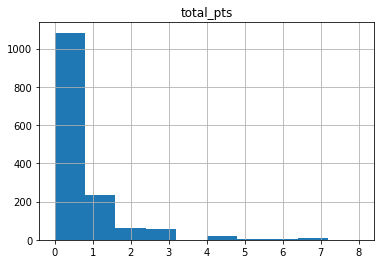

In [20]:
import matplotlib

tracks_df.hist(column = 'total_pts')

In [21]:
# getting top artists

#top short term artists (3)
artists_short = sp.current_user_top_artists(limit = 100, offset=0, time_range='short_term')['items']

artist_short_id = [] 
artist_short_names = []

for i in range(0, len(artists_short)):
    #Removes the local tracks in your playlist if there is any
    artist_short_id.append(artists_short[i]['id'])
    artist_short_names.append(artists_short[i]['name'])

#top medium term artists (2)

artists_med = sp.current_user_top_artists(limit = 100, offset=0, time_range='medium_term')['items']

artist_med_id = [] 
artist_med_names = []

for i in range(0, len(artists_med)):
    #Removes the local tracks in your playlist if there is any
    artist_med_id.append(artists_med[i]['id'])
    artist_med_names.append(artists_med[i]['name'])

#top long term artists (1)

artists_long = sp.current_user_top_artists(limit = 100, offset=0, time_range='long_term')['items']

artist_long_id = [] 
artist_long_names = []

for i in range(0, len(artists_long)):
    #Removes the local tracks in your playlist if there is any
    artist_long_id.append(artists_long[i]['id'])
    artist_long_names.append(artists_long[i]['name'])

In [22]:
short_tuples = list(zip(artist_short_id, artist_short_names))

artist_short_df = pd.DataFrame(short_tuples, columns=['artist_id','artist_name'])

artist_short_df['artist_short_pts'] = 3

artist_short_df.head()

,artist_id,artist_name,artist_short_pts
0,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,3
1,0fA0VVWsXO9YnASrzqfmYu,Kid Cudi,3
2,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,3
3,5pKCCKE2ajJHZ9KAiaK11H,Rihanna,3
4,2h93pZq0e7k5yf4dywlkpM,Frank Ocean,3


In [23]:
med_tuples = list(zip(artist_med_id, artist_med_names))

artist_med_df = pd.DataFrame(med_tuples, columns=['artist_id','artist_name'])

artist_med_df['artist_med_pts'] = 2

artist_med_df.head()

,artist_id,artist_name,artist_med_pts
0,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,2
1,0fA0VVWsXO9YnASrzqfmYu,Kid Cudi,2
2,3eNYrVLcWfjJ9JdH9kiPJO,Linked Horizon,2
3,0YC192cP3KPCRWx8zr8MfZ,Hans Zimmer,2
4,6m14xgA0m3w92UM7ujJgky,UVERworld,2


In [24]:
long_tuples = list(zip(artist_long_id, artist_long_names))

artist_long_df = pd.DataFrame(long_tuples, columns = ['artist_id', 'artist_name'])

artist_long_df['artist_long_pts'] = 1

artist_long_df.head()

,artist_id,artist_name,artist_long_pts
0,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,1
1,3TVXtAsR1Inumwj472S9r4,Drake,1
2,1RyvyyTE3xzB2ZywiAwp0i,Future,1
3,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,1
4,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,1


In [78]:
tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,tempo,valence,uri,added_time,short_pts,med_pts,long_pts,time_pts,total_pts,artist_id
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,117.002,0.425,spotify:track:46lZpwebFWgqad5CX1iv6r,2021-05-14 19:10:01+00:00,3.0,0.0,0.0,4.0,7.0,3FRVhQjAe73b3Et1XsOCnF
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,106.976,0.656,spotify:track:5Pc594FhDA2Fa2prE75GT0,2021-05-13 22:30:16+00:00,3.0,0.0,0.0,4.0,7.0,6M2wZ9GZgrQXHCFfjv46we
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,176.089,0.429,spotify:track:0fea68AdmYNygeTGI4RC18,2021-05-13 03:41:42+00:00,0.0,0.0,0.0,4.0,4.0,1vyhD5VmyZ7KMfW5gqLgo5
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,120.092,0.234,spotify:track:5ZicFGBDAi9J2YCVesboUp,2021-05-11 16:09:42+00:00,0.0,0.0,0.0,4.0,4.0,1Xyo4u8uXC1ZmMpatF05PJ
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,114.960,0.613,spotify:track:4pHQ9RYFhn3W0ha5KEuMnj,2021-05-11 16:09:32+00:00,0.0,0.0,0.0,4.0,4.0,1Xyo4u8uXC1ZmMpatF05PJ


In [26]:
tracks_df = tracks_df.merge(artist_short_df, how = 'left', on = 'artist_id')
tracks_df = tracks_df.merge(artist_med_df, how = 'left', on = 'artist_id')
tracks_df = tracks_df.merge(artist_long_df, how = 'left', on = 'artist_id')


tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,med_pts,long_pts,time_pts,total_pts,artist_name_x,artist_short_pts,artist_name_y,artist_med_pts,artist_name,artist_long_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,0.0,0.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,0.0,0.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,0.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,0.0,0.0,4.0,4.0,The Weeknd,3.0,The Weeknd,2.0,The Weeknd,1.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,0.0,0.0,4.0,4.0,The Weeknd,3.0,The Weeknd,2.0,The Weeknd,1.0


In [36]:
tracks_df.loc[tracks_df['artist_short_pts'] > 1, 'artist_med_pts'] = 0
tracks_df.loc[tracks_df['artist_short_pts'] > 1, 'artist_long_pts'] = 0

tracks_df.loc[tracks_df['artist_med_pts'] > 1, 'artist_long_pts'] = 0

In [45]:
tracks_df['total_pts'] = tracks_df['short_pts'] + tracks_df['med_pts'] + tracks_df['long_pts'] + tracks_df['time_pts'] + tracks_df['artist_short_pts'] + tracks_df['artist_med_pts'] + tracks_df['artist_long_pts']

print(max(tracks_df['total_pts']))

11.0


array([[<AxesSubplot:title={'center':'total_pts'}>]], dtype=object)

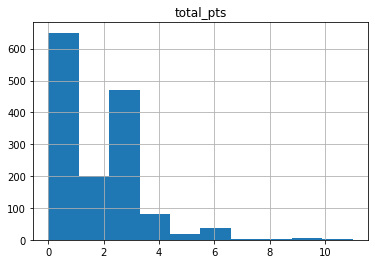

In [51]:
tracks_df.hist(column = 'total_pts')

In [52]:
#tracks_df = tracks_df.drop(columns = ['artist_name_x', 'artist_name_y'])
#tracks_df = tracks_df.drop(columns = ['uri'])
tracks_df = tracks_df.drop(columns = ['artist_name'])

tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,added_time,song_name,short_pts,med_pts,long_pts,time_pts,total_pts,artist_short_pts,artist_med_pts,artist_long_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,2021-05-14 19:10:01+00:00,Entrégala,3.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,2021-05-13 22:30:16+00:00,Pretty Please,3.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,2021-05-13 03:41:42+00:00,LA CANCIÓN,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,2021-05-11 16:09:42+00:00,Professional,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,2021-05-11 16:09:32+00:00,Adaptation,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0


In [49]:
tracks_df.tail()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,song_name,short_pts,med_pts,long_pts,time_pts,total_pts,artist_short_pts,artist_med_pts,artist_name,artist_long_pts
1463,62vpWI1CHwFy7tMIcSStl8,0.3010,0.692,292987,0.521,0.000000,10,0.0565,-8.465,0,...,No Role Modelz,0.0,0.0,0.0,0.0,3.0,3.0,0.0,J. Cole,0.0
1464,1Kp6WFxRzc0sRBmGSgIYat,0.2090,0.597,167320,0.856,0.015900,10,0.2780,-7.089,0,...,Gang Related,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Logic,1.0
1465,0Kojfmpnf0A2yC1zyv39Zx,0.0916,0.755,337747,0.830,0.000038,3,0.2980,-6.494,0,...,Buried Alive,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Logic,1.0
1466,17A18khjCRm3uNcd2fFn4I,0.1640,0.621,244880,0.631,0.000000,4,0.2640,-6.323,0,...,Bounce,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Logic,1.0
1467,5LME7YULt0enp6UAB8VoDn,0.2390,0.701,559533,0.856,0.000000,11,0.1060,-5.465,1,...,Under Pressure,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Logic,1.0


In [50]:
tracks_df.loc[tracks_df['total_pts'] == 11]

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,song_name,short_pts,med_pts,long_pts,time_pts,total_pts,artist_short_pts,artist_med_pts,artist_name,artist_long_pts
109,30KctD1WsHKTIYczXjip5a,0.084,0.712,193293,0.556,0.00005,5,0.527,-7.214,0,...,Tequila Shots,3.0,2.0,1.0,2.0,11.0,3.0,0.0,Kid Cudi,0.0


In [53]:
tracks_df.to_csv('../data/raw/raw_library_data.csv', index = False)